<a href="https://colab.research.google.com/github/mfdali/artificial-fracture-3D/blob/main/3D_fracture_simulation_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 3D simulation

# Project: Fractured medium

# Core Sample: Artificial (thin box, eggshell and periodic with slope)

# Author: Monique Dali @mfdali

# Company: @lmmp

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Mesh Test

Slope

In [26]:
# File with mesh test information
filename = "https://raw.githubusercontent.com/mfdali/artificial-fracture-3D/main/data/test_3d_meshes-slope.txt"

In [27]:
#Load data

# Read file
df = pd.read_csv(filename,header=0,sep=',')

In [28]:
# Label the simulated scenarios
df['label'] = df['mesh'].str[10:13]+df['mesh'].str[26:]

In [29]:
# Ascending order of degrees of freedom
df.sort_values(by=['dofs'],inplace=True)

In [42]:
#Update index
df = df.reset_index(drop=True)

In [43]:
# Visualize dataframe
df.head()

,mesh,triangles,dofs,solver,avg_ah,x,y,z,inflow,outflow,deviation,k_eq,k_f,exec_time,Area,ah_lub,label
0,x2_reducedv3_1mm_meshsize_0004,62305,351545,minres,0.001,0.05,0.02,0.0009,0.000215,0.000215,0.000206,7.819800e-08,8.333500e-08,212.504,0.001024,1000.012,v3_0004
1,x2_reducedv3_1mm_meshsize_00035,80426,451162,minres,0.001,0.05,0.02,0.0009,0.000215,0.000215,0.000122,7.809300e-08,8.334000e-08,295.423,0.001024,1000.039,v3_00035
2,x2_reducedv3_1mm_meshsize_0003,121597,655427,minres,0.001,0.05,0.02,0.0009,0.000215,0.000215,-0.000106,7.804200e-08,8.333500e-08,546.927,0.001025,1000.010,v3_0003
3,x2_reducedv2_1mm_meshsize_00035,152018,802687,minres,0.001,0.05,0.02,0.0009,0.000215,0.000215,-0.000014,7.805100e-08,8.333200e-08,741.996,0.001025,999.995,v2_00035
4,x2_reducedv3_1mm_meshsize_00025,197725,1022671,minres,0.001,0.05,0.02,0.0009,0.000215,0.000215,-0.000382,7.803200e-08,8.334100e-08,1007.330,0.001026,1000.048,v3_00025


<Figure size 640x480 with 0 Axes>

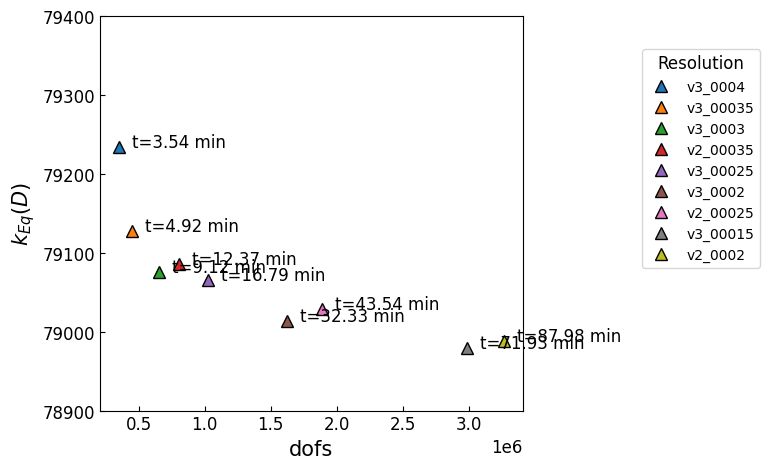

In [44]:
#Plot mesh test
plt.figure(tight_layout=True)
fig, ax = plt.subplots()

#Plot numerical calculations x dofs
for i in range(0,len(df)):
  ax.plot(df['dofs'][i],df['k_eq'][i]*1013250000000, '^', markersize=8,color='k', markerfacecolor='C'+str(i),label = df['label'][i])
  #Set label for each point
  plt.text(df['dofs'][i]+100000,df['k_eq'][i]*1013250000000,"t="+str(round(df['exec_time'][i]/60,2))+" min",horizontalalignment='left')#, verticalalignment='top')

# Set label axis
ax.set_ylabel('$k_{Eq} (D)$', fontsize = 15)
ax.set_xlabel('dofs', fontsize = 15)

# Set axis limits
ax.set_ylim([78900,79400])

# Set legend
fig.legend(loc=2,ncol=1,title='Resolution',bbox_to_anchor = (1.00, 0.9))

# Set style
plt.style.use('default')
fig.patch.set_facecolor('xkcd:white')
fig.tight_layout()
plt.rcParams['font.size'] = 12
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.show()

#Save graph if necessary
#plt.savefig("mesh_test_slope.png")

<Figure size 640x480 with 0 Axes>

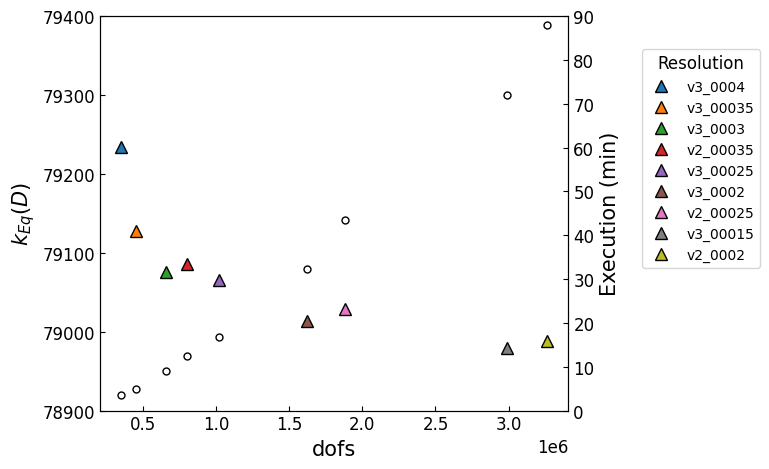

In [45]:
#Plot mesh test
plt.figure(tight_layout=True)
fig, ax1 = plt.subplots()
# Create secondary axis
ax2 = ax1.twinx()

#Plot numerical calculations x dofs
for i in range(0,len(df)):
  # plot in main axis
  ax1.plot(df['dofs'][i],df['k_eq'][i]*1013250000000, '^', markersize=8,color='k', markerfacecolor='C'+str(i),label = df['label'][i])
  # plot in secondary axis
  ax2.plot(df['dofs'][i],round(df['exec_time'][i]/60,2), 'o', markersize=5,color='k', markerfacecolor='white')

# Set label axis
ax1.set_ylabel('$k_{Eq} (D)$', fontsize = 15)
ax1.set_xlabel('dofs', fontsize = 15)

# Set secondary label
ax2.set_ylabel('Execution (min)', fontsize = 15)

# Set axis limits
ax1.set_ylim([78900,79400])
# Set secondary limits
ax2.set_ylim([0,90])

# Set legend
fig.legend(loc=2,ncol=1,title='Resolution',bbox_to_anchor = (1.00, 0.9))

# Set style
plt.style.use('default')
fig.patch.set_facecolor('xkcd:white')
fig.tight_layout()
plt.rcParams['font.size'] = 12
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.show()

#Save graph if necessary
#plt.savefig("mesh_test_slope.png")